In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.read_csv('gdp.csv')

In [13]:
df.shape

(11507, 4)

In [15]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [21]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64


### Given data set have no missing values

In [28]:

# (In this dataset, the data types appear to be correct, but we'll confirm)
print("\nData types:\n", df.dtypes)


Data types:
 Country Name     object
Country Code     object
Year              int64
Value           float64
dtype: object


### Data types are correct

In [35]:
# Sort the data by 'Country Name' and 'Year' to ensure correct calculation
df = df.sort_values(by=['Country Name', 'Year'])

In [37]:
df['GDP Growth Rate (%)'] = df.groupby('Country Name')['Value'].pct_change() * 100

In [39]:
print(df['GDP Growth Rate (%)'])

2306           NaN
2307      2.066111
2308     -0.404857
2309     37.398386
2310      6.508870
           ...    
11502    17.721604
11503     8.490639
11504     2.842915
11505     2.602840
11506     1.933757
Name: GDP Growth Rate (%), Length: 11507, dtype: float64


### Data Set is cleaned and ready to use for analysis

# EDA

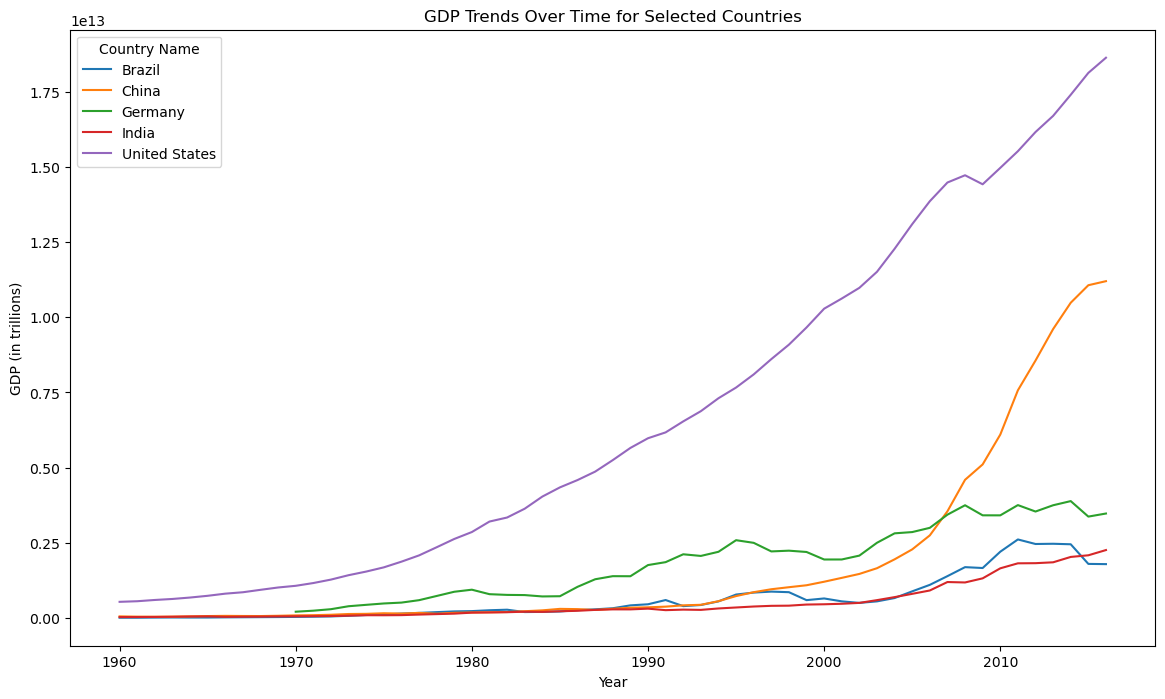

In [45]:
#Analyze GDP trends for a few selected countries
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
gdp_selected = df[df['Country Name'].isin(selected_countries)]
plt.figure(figsize=(14, 8))
sns.lineplot(data=gdp_selected, x='Year', y='Value', hue='Country Name')
plt.title('GDP Trends Over Time for Selected Countries')
plt.ylabel('GDP (in trillions)')
plt.xlabel('Year')
plt.show()

In [47]:
#Identify the Top/Bottom Countries Based on GDP

latest_year = df['Year'].max()

# Filter data for the latest year
gdp_latest_year = df[df['Year'] == latest_year]

# Sort by GDP value
gdp_sorted = gdp_latest_year.sort_values(by='Value', ascending=False)

# Top 10 countries by GDP
top_10_countries = gdp_sorted.head(10)

# Bottom 10 countries by GDP
bottom_10_countries = gdp_sorted.tail(10)

print("Top 10 Countries by GDP in", latest_year)
print(top_10_countries[['Country Name', 'Value']])

print("\nBottom 10 Countries by GDP in", latest_year)
print(bottom_10_countries[['Country Name', 'Value']])

Top 10 Countries by GDP in 2016
                   Country Name         Value
2305                      World  7.584511e+13
718                 High income  4.855746e+13
1656               OECD members  4.755262e+13
1802  Post-demographic dividend  4.521331e+13
832            IDA & IBRD total  2.797282e+13
1300        Low & middle income  2.729938e+13
1542              Middle income  2.689707e+13
775                   IBRD only  2.598148e+13
246         East Asia & Pacific  2.248043e+13
2248        Upper middle income  2.062386e+13

Bottom 10 Countries by GDP in 2016
                Country Name         Value
4196                 Comoros  6.166545e+08
4687                Dominica  5.814840e+08
10619                  Tonga  4.015620e+08
9333   Sao Tome and Principe  3.427817e+08
7853   Micronesia, Fed. Sts.  3.298956e+08
8684                   Palau  3.102483e+08
7666        Marshall Islands  1.944979e+08
6765                Kiribati  1.815515e+08
8128                   Nauru  1.020601e

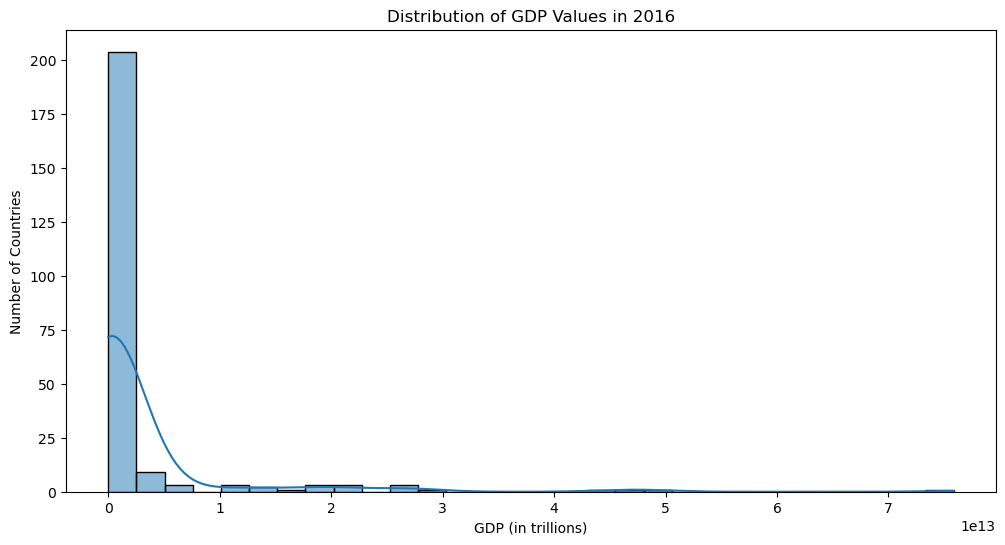

In [49]:
# Histogram of GDP values in the latest year
plt.figure(figsize=(12, 6))
sns.histplot(gdp_latest_year['Value'], bins=30, kde=True)
plt.title('Distribution of GDP Values in ' + str(latest_year))
plt.xlabel('GDP (in trillions)')
plt.ylabel('Number of Countries')
plt.show()

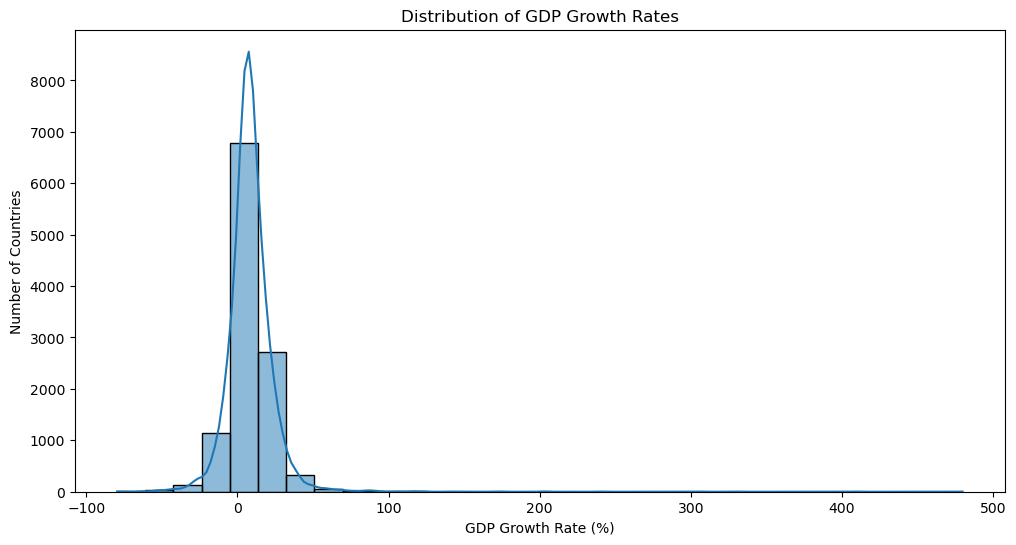

In [53]:
# GDP Growth Rate Distribution for all countries
plt.figure(figsize=(12, 6))
sns.histplot(df['GDP Growth Rate (%)'].dropna(), bins=30, kde=True)
plt.title('Distribution of GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Number of Countries')
plt.show()

In [55]:
# GDP trends over time for the top 5 countries
top_5_countries = gdp_sorted.head(5)['Country Name'].tolist()
gdp_top_5 = df[df['Country Name'].isin(top_5_countries)]

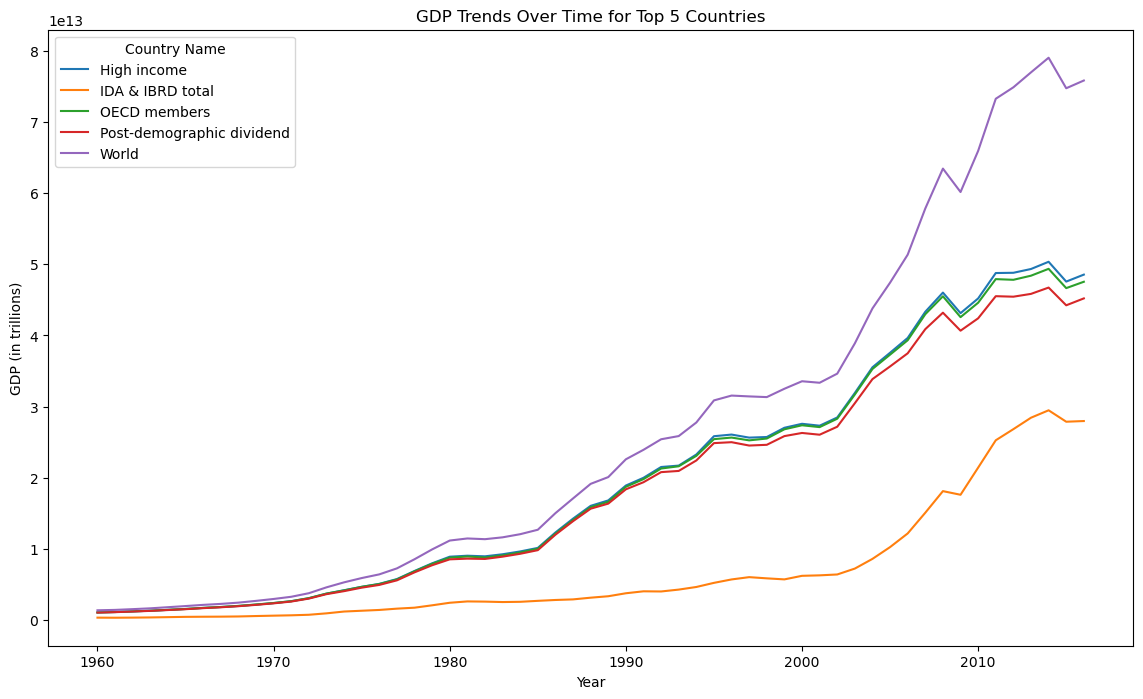

In [57]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=gdp_top_5, x='Year', y='Value', hue='Country Name')
plt.title('GDP Trends Over Time for Top 5 Countries')
plt.ylabel('GDP (in trillions)')
plt.xlabel('Year')
plt.show()

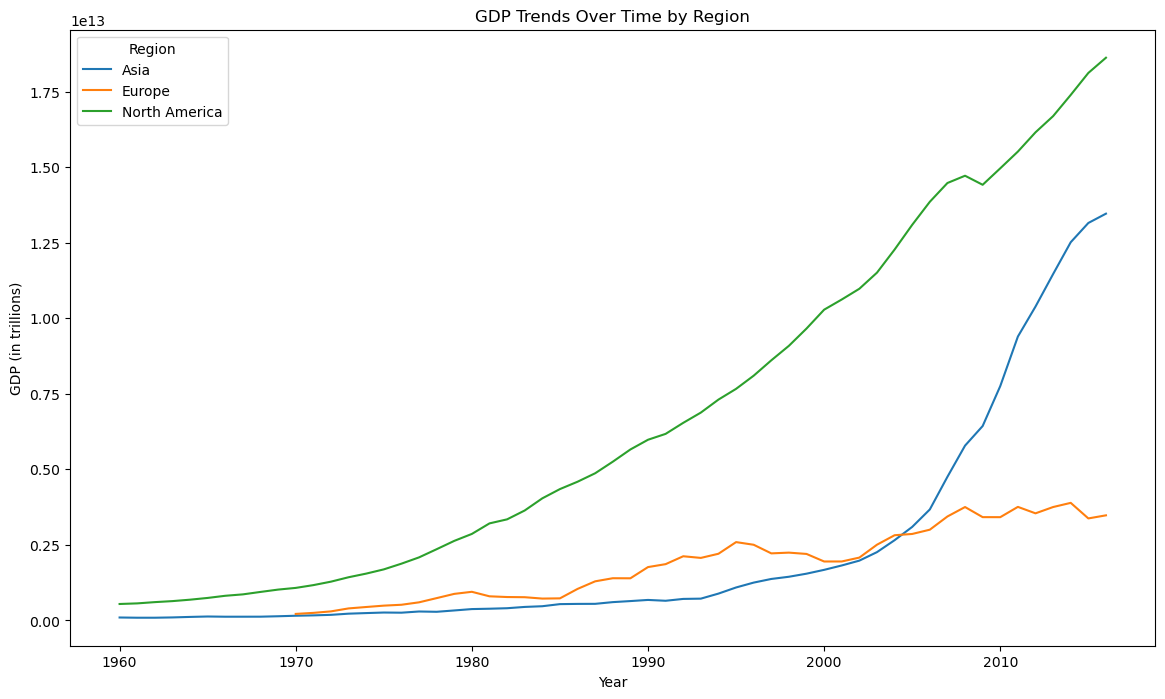

In [61]:
# Assuming you have a mapping of countries to regions
region_mapping = {
    'United States': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Germany': 'Europe',
    # Add more countries and their regions here...
}

# Add a 'Region' column to the dataset
df['Region'] = df['Country Name'].map(region_mapping)

# Group by Region and Year to analyze trends
gdp_by_region = df.groupby(['Region', 'Year'])['Value'].sum().reset_index()

# Plot GDP trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=gdp_by_region, x='Year', y='Value', hue='Region')
plt.title('GDP Trends Over Time by Region')
plt.ylabel('GDP (in trillions)')
plt.xlabel('Year')
plt.show()

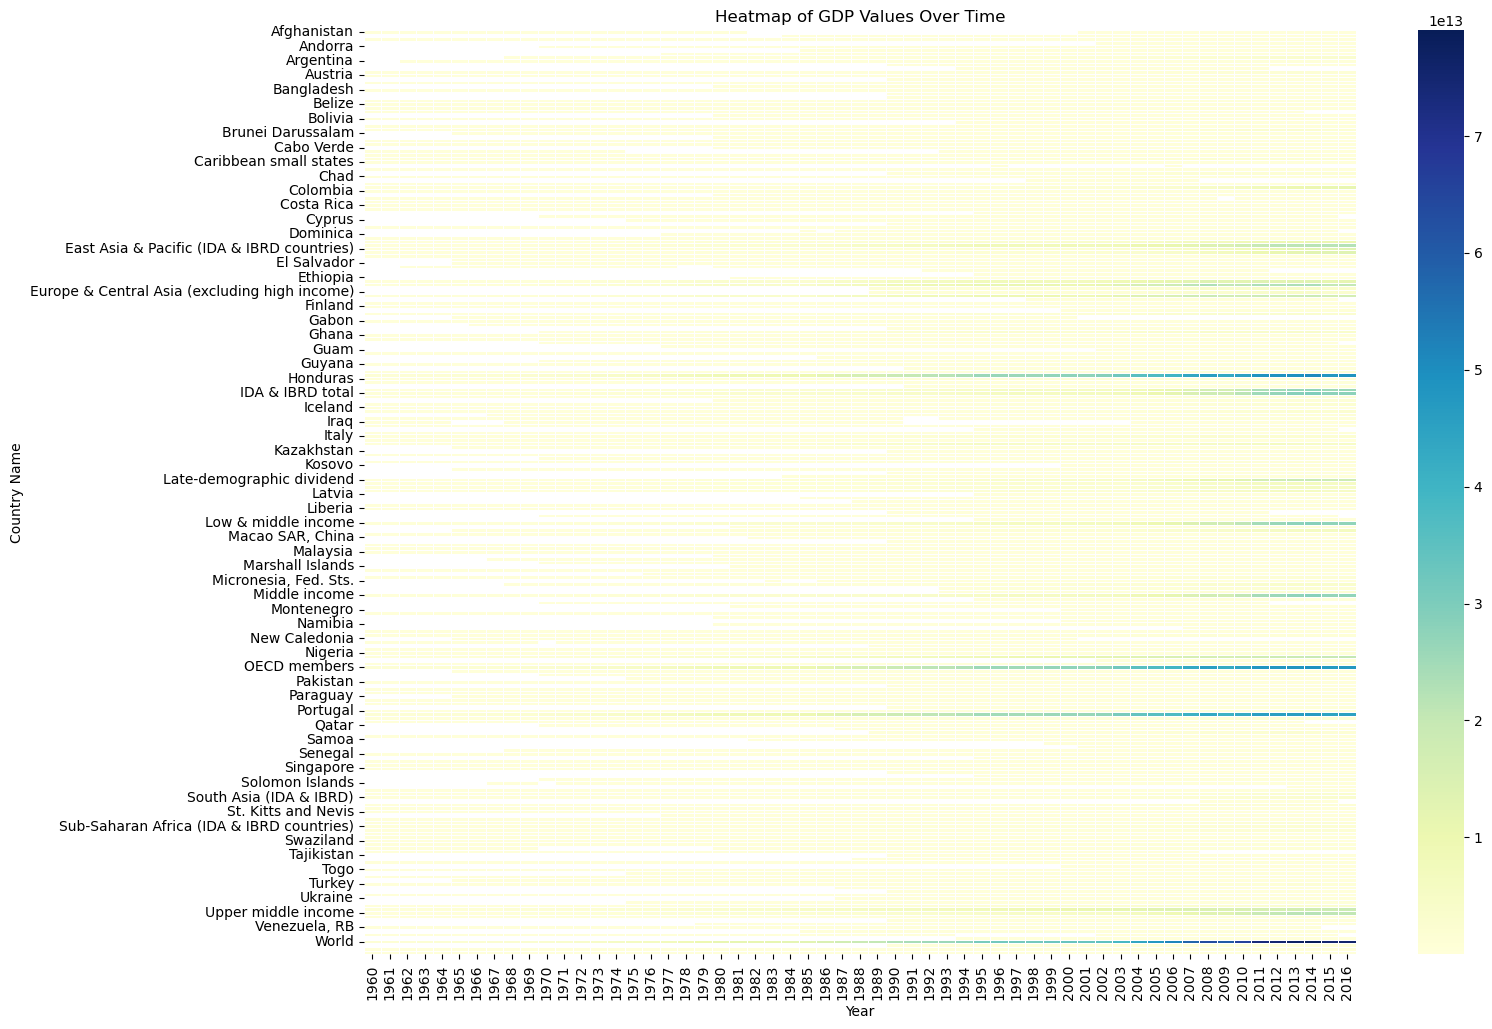

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Pivot the data to create a matrix for the heatmap
gdp_pivot = df.pivot(index='Country Name', columns='Year', values='Value')

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(gdp_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of GDP Values Over Time')
plt.ylabel('Country Name')
plt.xlabel('Year')
plt.show()